> # Heart Disease
> ## Samuel Yap
> ## 09011281722037
> ## SK5A

### Informasi Dataset
Penyakit jantung menggambarkan serangkaian kondisi yang memengaruhi jantung Anda. Penyakit di bawah payung penyakit jantung termasuk penyakit pembuluh darah, seperti penyakit arteri koroner; masalah irama jantung (aritmia); dan cacat jantung sejak lahir (cacat jantung bawaan), antara lain.

Istilah "penyakit jantung" sering digunakan secara bergantian dengan istilah "penyakit kardiovaskular." Penyakit kardiovaskular umumnya mengacu pada kondisi yang melibatkan penyempitan atau penyumbatan pembuluh darah yang dapat menyebabkan serangan jantung, nyeri dada (angina) atau stroke. Kondisi jantung lainnya, seperti yang memengaruhi otot, katup, atau ritme jantung Anda, juga dianggap sebagai bentuk penyakit jantung.

### Model dan Layer

Pada kasus ini, model yang digunakan untuk membuat hidden layer untuk memproses data memiliki fungsi squential.Sedangkan layer sendiri menggunakantipe Danse yang melakukan training dengan menghubungkan setiap Neural Network secara sequential. 

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
data = pd.read_csv ('heart.csv') 

# Import Dataset

Dataset yang digunakan dalam proses Neural Network ini telah menggunakan format.csv yang merupakan data vekto yang berisi angka-angka sehingga dapat diproses oleh IDE dengan lebih mudah. Pengolahan data yang bertipe string biasanya harus dengan perlakuan tertentu dan tentu saja sedikit lebih rumit,  karena data string tersebut harus ditranslasi dengan menggunakan fungsi yang lebih spesifik.

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data_raw = data.iloc[:,0:8].values
target = data.iloc[:,8].values

In [5]:
dataa=pd.DataFrame(data_raw)
dataa

,0,1,2,3,4,5,6,7
0,63,1,3,145,233,1,0,150
1,37,1,2,130,250,0,1,187
2,41,0,1,130,204,0,0,172
3,56,1,1,120,236,0,1,178
4,57,0,0,120,354,0,1,163
5,57,1,0,140,192,0,1,148
6,56,0,1,140,294,0,0,153
7,44,1,1,120,263,0,1,173
8,52,1,2,172,199,1,1,162
9,57,1,2,150,168,0,1,174


In [6]:
data.shape

(303, 14)

In [7]:
x= data.iloc[:,:13].values
y = data.iloc[:,13].values

In [8]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [9]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=2)

## Preprocessing data.
Preprocessing disini merupakan penskalaan nilai atribut dari data sehingga bisa jatuh pada range tertentu. Metode normalisasi yang digunakan yaitu Min Max, Metode Min-Max merupakan metode normalisasi dengan melakukan transformasi linier terhadap data asli.

In [11]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data_raw)
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290


In [12]:
classifications = 2

## Model ANN  
Model ANN yang digunakan dengan hidden layer 1 dan node pada hidden layer 100, input layer 1 dan node input layer 8. 
Fungsi aktivasi yang digunakan yaitu Relu.

In [13]:
model = Sequential()
model.add(Dense(units= 100, input_dim =13 , activation='relu'))
model.add(Dense(units= 100, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [14]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## Proses Training
Untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah proses traning. Dimana pada proses ini terjadi proses training dengan parameter:

1. X yang telah diprocessing
2. Y yang telah dikonversi menjadi categorical
3. Banyaknya Epochs atau proses training
4. Batch_size

Disini Epochs atau training yang di lakukan sebanyak 250 kali.

In [15]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, 
                         epochs=250)

Train on 272 samples, validate on 31 samples
Epoch 1/250
272/272 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.6250 - val_loss: 0.5472 - val_accuracy: 0.7742
Epoch 2/250
272/272 [==============================] - 0s 250us/step - loss: 0.7128 - accuracy: 0.6360 - val_loss: 0.5106 - val_accuracy: 0.7097
Epoch 3/250
272/272 [==============================] - 0s 235us/step - loss: 0.6821 - accuracy: 0.6287 - val_loss: 0.5244 - val_accuracy: 0.7097
Epoch 4/250
272/272 [==============================] - 0s 206us/step - loss: 0.6580 - accuracy: 0.6324 - val_loss: 0.5130 - val_accuracy: 0.7419
Epoch 5/250
272/272 [==============================] - 0s 191us/step - loss: 0.6363 - accuracy: 0.6581 - val_loss: 0.5737 - val_accuracy: 0.7097
Epoch 6/250
272/272 [==============================] - 0s 206us/step - loss: 0.6240 - accuracy: 0.6838 - val_loss: 0.5700 - val_accuracy: 0.6774
Epoch 7/250
272/272 [==============================] - 0s 206us/step - loss: 0.6260 - a

Epoch 57/250
272/272 [==============================] - 0s 221us/step - loss: 0.4959 - accuracy: 0.7757 - val_loss: 0.4089 - val_accuracy: 0.8387
Epoch 58/250
272/272 [==============================] - 0s 206us/step - loss: 0.5507 - accuracy: 0.6912 - val_loss: 0.4500 - val_accuracy: 0.8065
Epoch 59/250
272/272 [==============================] - 0s 206us/step - loss: 0.6289 - accuracy: 0.6544 - val_loss: 0.4808 - val_accuracy: 0.7419
Epoch 60/250
272/272 [==============================] - 0s 221us/step - loss: 0.4976 - accuracy: 0.7574 - val_loss: 0.3996 - val_accuracy: 0.8387
Epoch 61/250
272/272 [==============================] - 0s 250us/step - loss: 0.4687 - accuracy: 0.7684 - val_loss: 0.3976 - val_accuracy: 0.8710
Epoch 62/250
272/272 [==============================] - 0s 221us/step - loss: 0.4801 - accuracy: 0.7757 - val_loss: 0.4102 - val_accuracy: 0.8710
Epoch 63/250
272/272 [==============================] - 0s 206us/step - loss: 0.4645 - accuracy: 0.7721 - val_loss: 0.4089 -

272/272 [==============================] - 0s 221us/step - loss: 0.4377 - accuracy: 0.8125 - val_loss: 0.3273 - val_accuracy: 0.9355
Epoch 114/250
272/272 [==============================] - 0s 206us/step - loss: 0.4127 - accuracy: 0.7978 - val_loss: 0.3237 - val_accuracy: 0.9355
Epoch 115/250
272/272 [==============================] - 0s 206us/step - loss: 0.4172 - accuracy: 0.8088 - val_loss: 0.3338 - val_accuracy: 0.9032
Epoch 116/250
272/272 [==============================] - 0s 206us/step - loss: 0.4848 - accuracy: 0.7757 - val_loss: 0.3437 - val_accuracy: 0.8710
Epoch 117/250
272/272 [==============================] - 0s 221us/step - loss: 0.4424 - accuracy: 0.7868 - val_loss: 0.3393 - val_accuracy: 0.8710
Epoch 118/250
272/272 [==============================] - 0s 250us/step - loss: 0.4344 - accuracy: 0.8125 - val_loss: 0.3254 - val_accuracy: 0.8710
Epoch 119/250
272/272 [==============================] - 0s 265us/step - loss: 0.4134 - accuracy: 0.8015 - val_loss: 0.3187 - val_ac

Epoch 169/250
272/272 [==============================] - 0s 265us/step - loss: 0.4193 - accuracy: 0.8088 - val_loss: 0.3305 - val_accuracy: 0.8387
Epoch 170/250
272/272 [==============================] - 0s 265us/step - loss: 0.4839 - accuracy: 0.7537 - val_loss: 0.3447 - val_accuracy: 0.8065
Epoch 171/250
272/272 [==============================] - 0s 221us/step - loss: 0.4511 - accuracy: 0.7868 - val_loss: 0.2823 - val_accuracy: 0.9032
Epoch 172/250
272/272 [==============================] - 0s 206us/step - loss: 0.3825 - accuracy: 0.8199 - val_loss: 0.2856 - val_accuracy: 0.9355
Epoch 173/250
272/272 [==============================] - 0s 221us/step - loss: 0.4029 - accuracy: 0.7757 - val_loss: 0.2838 - val_accuracy: 0.9032
Epoch 174/250
272/272 [==============================] - 0s 427us/step - loss: 0.3824 - accuracy: 0.8015 - val_loss: 0.2867 - val_accuracy: 0.9355
Epoch 175/250
272/272 [==============================] - 0s 677us/step - loss: 0.3935 - accuracy: 0.8162 - val_loss: 0

Epoch 225/250
272/272 [==============================] - 0s 250us/step - loss: 0.3724 - accuracy: 0.8419 - val_loss: 0.2880 - val_accuracy: 0.8710
Epoch 226/250
272/272 [==============================] - 0s 265us/step - loss: 0.3711 - accuracy: 0.8346 - val_loss: 0.2762 - val_accuracy: 0.9355
Epoch 227/250
272/272 [==============================] - 0s 250us/step - loss: 0.3837 - accuracy: 0.8199 - val_loss: 0.2812 - val_accuracy: 0.9032
Epoch 228/250
272/272 [==============================] - 0s 250us/step - loss: 0.3826 - accuracy: 0.8272 - val_loss: 0.2796 - val_accuracy: 0.9355
Epoch 229/250
272/272 [==============================] - 0s 221us/step - loss: 0.4021 - accuracy: 0.7941 - val_loss: 0.3470 - val_accuracy: 0.8387
Epoch 230/250
272/272 [==============================] - 0s 235us/step - loss: 0.4157 - accuracy: 0.7904 - val_loss: 0.2863 - val_accuracy: 0.9032
Epoch 231/250
272/272 [==============================] - 0s 206us/step - loss: 0.3825 - accuracy: 0.8272 - val_loss: 0

# Evaluasi Model

Secara umum, performa dari proses model Neural Network untuk dataset diabetic retinopathy yang dibuat tadu sudah dapat dilihat dengan menampilkan akurasinya. Hanya saja, untuk peforma lain seperti Precisision, Spesificity, dan Sensitivity belum dapat diketahui, karena membutuhkan fungsi yang berbeda, yaitu confusion matrix.

In [16]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

31/31 [==============================] - 0s 0us/step


[0.25995713472366333, 0.9354838728904724]

## Menampilkan Model Akurasi

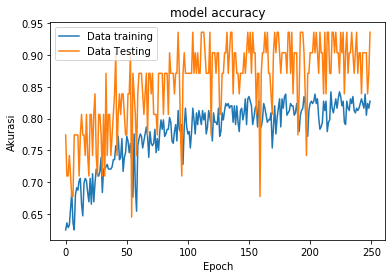

In [17]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

## Menampilkan Model loss

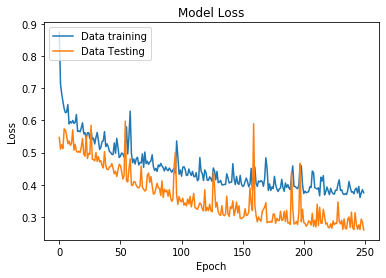

In [18]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

### CONFUSION MATRIX

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [21]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[13  2]
 [ 0 16]]


In [22]:
print(y_test)
print(prediction)

[1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]


## Perhitungan
### precision, recall, f1 score, akurasi, spec, Sensitivity

In [23]:
tp = cm[0,0]
tn = cm[1,1] + cm[1,1]  
fp = cm[1,0] + cm[1,0]  
fn = cm[0,1] + cm[0,1] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [24]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  1.0
recall :  0.7647058823529411
F1 :  0.8666666666666666
sensitivity :  0.7647058823529411
akurasi :  0.9183673469387755


In [25]:
tp = cm[1,1]
tn = cm[0,0] + cm[1,1] 
fp = cm[0,1] + cm[1,1] 
fn = cm[1,0] + cm[1,1] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.47058823529411764
recall :  0.5
F1 :  0.48484848484848486
spec :  0.6170212765957447
sensitivity :  0.5
akurasi :  0.569620253164557


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.89      1.00      0.94        16

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

